## Logistic regression

- Pros: Computationally inexpensive, easy to implement,
    knowledge representation easy to interpret
- Cons: Prone to underfitting, may have low accuracy
- Works with: Numeric values, nominal values

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Implement Logistic Regression

Loss function: $J(\theta)=-\frac{1}{m}[\sum_{i=1}^m
    {y^{(i)}\log{h_{\theta}}(x^{(i)})+(1-y^{(i)})\log{(1-h_{\theta}}(x^{(i)}))}]$

Gradient: $\theta_j := \theta_j -
    \alpha\sum_{i=1}^m{(h_{\theta}(x^{(i)})-y^{(i)})x^{(i)}_j}$

In [2]:
# Logistic regression gradient ascent optimization functions
def sigmoid(inX):
    return 1 / (1 + np.exp(-inX))


def gradAscent(dataMatrix, classLabels):
    # Convert to NumPy matrix data type
    alpha = 0.001
    maxCycles = 500
    weights = np.ones(dataMatrix.shape[1])
    for k in range(maxCycles):
        # Matrix multiplication
        h = sigmoid(np.dot(dataMatrix, weights))
        error = classLabels - h
        weights = weights + alpha * np.dot(dataMatrix.T, error)
    return weights

In [3]:
# Stochastic gradient ascent
# Start with the weights all set to 1
# Repeat R number of times:
#     Calculate the gradient of the entire dataset
#     Update the weights vector by alpha*gradient
#     Return the weights vector
def stocGradAscent0(dataMatrix, classLabels):
    alpha = 0.01
    weights = np.ones(dataMatrix.shape[1])
    for i in range(dataMatrix.shape[0]):
        h = sigmoid(np.dot(dataMatrix[i], weights))
        error = classLabels[i] - h
        weights = weights + alpha * error * dataMatrix[i]
    return weights

In [4]:
# Modified stochastic gradient ascent
# Start with the weights all set to 1
# For each piece of data in the dataset:
#     Calculate the gradient of one piece of data
#     Update the weights vector by alpha*gradient
# Return the weights vector
def stocGradAscent1(dataMatrix, classLabels, numIter=150):
    m, n = dataMatrix.shape
    weights = np.ones(n)
    for j in range(numIter):
        dataIndex = list(range(m))
        for i in range(m):
            # Alpha changes with each iteration
            alpha = 4 / (1.0 + j + i) + 0.01
            # Update vectors are randomly selected
            randIndex = int(np.random.uniform(0, len(dataIndex)))
            # h = sigmoid(sum(dataMatrix[randIndex] * weights))
            # error = classLabels[randIndex] - h
            # weights = weights + alpha * error * dataMatrix[randIndex]
            h = sigmoid(np.dot(dataMatrix[dataIndex[randIndex]], weights))
            error = classLabels[dataIndex[randIndex]] - h
            weights = (weights +
                       alpha * error * dataMatrix[dataIndex[randIndex]])
            del(dataIndex[randIndex])
    return weights

### Experiment 1: Toy dataset

In [5]:
def loadDataSet():
    dataMat, labelMat = [], []
    fr = open('testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return np.array(dataMat), np.array(labelMat)

In [6]:
dataArr, labelMat = loadDataSet()
gradAscent(dataArr, labelMat)

array([ 4.12414349,  0.48007329, -0.6168482 ])

In [7]:
# Plotting the logistic regression best-fit line and dataset
def plotBestFit(weights):
    dataMat, labelMat = loadDataSet()
    xcord1, ycord1 = [], []
    xcord2, ycord2 = [], []
    for i in range(dataArr.shape[0]):
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i, 1])
            ycord1.append(dataArr[i, 2])
        else:
            xcord2.append(dataArr[i, 1])
            ycord2.append(dataArr[i, 2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    # Best-fit line
    x = np.arange(-3.0, 3.0, 0.1)
    y = (-weights[0] - weights[1] * x) / weights[2]
    ax.plot(x, y)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

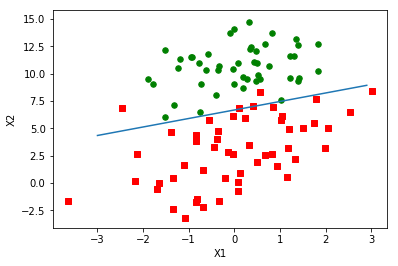

In [8]:
dataArr, labelMat = loadDataSet()
weights = gradAscent(dataArr, labelMat)
plotBestFit(weights)

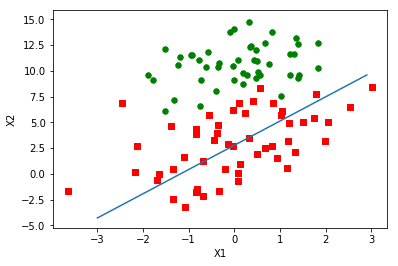

In [9]:
dataArr, labelMat = loadDataSet()
weights = stocGradAscent0(dataArr, labelMat)
plotBestFit(weights)

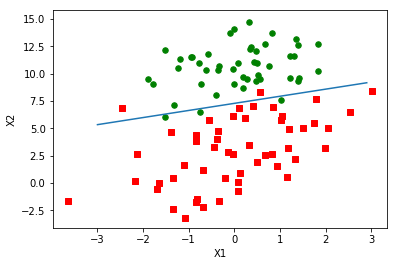

In [10]:
dataArr, labelMat = loadDataSet()
weights = stocGradAscent1(dataArr, labelMat)
plotBestFit(weights)

### Experiment 2: Horse colic dataset

In [11]:
# Logistic regression classification function
def classifyVector(inX, weights):
    prob = sigmoid(np.dot(inX, weights))
    if prob > 0.5:
        return 1
    else:
        return 0


def colicTest():
    frTrain = open('horseColicTraining.txt')
    frTest = open('horseColicTest.txt')
    trainingSet, trainingLabels = [], []
    for line in frTrain.readlines():
        currLine = line.strip().split('\t')
        lineArr = []
        for i in range(21):
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr)
        trainingLabels.append(float(currLine[21]))
    trainWeights = stocGradAscent1(np.array(trainingSet),
                                   np.array(trainingLabels), 1000)
    errorCount, numTestVec = 0, 0
    for line in frTest.readlines():
        numTestVec += 1
        currLine = line.strip().split('\t')
        lineArr = []
        for i in range(21):
            lineArr.append(float(currLine[i]))
        if int(classifyVector(np.array(lineArr),
                              trainWeights)) != int(currLine[21]):
            errorCount += 1
    errorRate = errorCount / numTestVec
    print("the error rate of this test is: %f" % errorRate)
    return errorRate


def multiTest():
    numTests = 10
    errorSum = 0
    for k in range(numTests):
        errorSum += colicTest()
    print("after %d iterations the average error rate is: %f"
          % (numTests, errorSum / numTests))

In [12]:
multiTest()

the error rate of this test is: 0.328358
the error rate of this test is: 0.283582
the error rate of this test is: 0.268657
the error rate of this test is: 0.268657
the error rate of this test is: 0.283582
the error rate of this test is: 0.313433
the error rate of this test is: 0.283582
the error rate of this test is: 0.507463
the error rate of this test is: 0.313433
the error rate of this test is: 0.283582
after 10 iterations the average error rate is: 0.313433
